# Grey Poupon: A Hip-Hop Lyrical Phenomena!

### I recently saw a video on an interesting trend in the field of Hip-Hop music about Grey Poupon - a brand of dijon mustard - having an unusual amount of references in the genre as an allegory for "the idea of status, luxury, and class" [[1]](#citations).

### While a funny fact, I feel we can analyze this further and consider more aspects regarding the usage of the brand in the Hip-Hop music landscape.

#### The questions we will answer are the following:

1. [How many songs mention the brand?](#brand)
2. [Which artists have made references to Grey Poupon? How many times?](#top_artists)
3. [Are there alternative spellings of Grey (i.e. Gray) used as well?](#grey_vs_gray)
4. [What are the top ten words in the lyrics?](#top_words)
5. [Are there permutations of the word "Poupon" in the lyrics and what are they?](#poupon_permutations)
6. [What are the most common nouns and verbs used in song lyrics with Grey Poupon?](#nouns_and_verbs)
7. [Are there any words in the lyrics the artists are rhyming with "Poupon"? Which words and how many?](#poupon_rhymes)

## Preface: First we will collect our song data from genius.com to clean and analyze later on (song titles, artist names and lyric snippets) [[2]](#citations):

In [4]:
import pyautogui, time, pandas as pd, matplotlib.pyplot as plt, csv, requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
from textblob import TextBlob

In [5]:
# Activate failsafe (moving mouse cursor to upper-left of window will stop program if needed)
pyautogui.FAILSAFE = True

# Initialize WebDriver
driver = webdriver.Chrome()

# Open the URL of the webpage
url = "https://genius.com/search?q=poupon"
driver.get(url)

# Trigger "Show more lyrics" link to bring up search results
link = driver.find_element(By.LINK_TEXT, "Show more lyric matches")
link.click()

In [6]:
pyautogui.hotkey("f12")
time.sleep(5)

page_html = bs(driver.page_source, "html.parser")


In [7]:
# Extract currently loaded search results
def collect_data(data_list, str_list):
    for list_item in data_list:
        str_list.append(str(list_item))

# Trigger webpage to load more results
def load_more_data():
    pyautogui.hotkey('ctrl', 'f')
    pyautogui.write('load_next()')
    time.sleep(2)
    page_html = bs(driver.page_source, "html.parser")
    html_data_list = list(page_html)
    html_data_list_str = str(html_data_list)
    return html_data_list_str, page_html
    

In [8]:
# Run load_more_data manually one time to feed the initial iteration of the while loop
html_data_list_str = load_more_data()
prior_html_list_str = []

In [9]:
# When end of results is reached, break while loop and continue program
while len(prior_html_list_str) != len(html_data_list_str):
    # Load more results and assign to lyric_poupon_check_list_str
    prior_html_list_str = html_data_list_str
    html_data_list_str, page_html = load_more_data()

In [10]:
# Collect song titles
song_title = page_html.find_all("div", {"class": "mini_card-title"})
song_title_list = list(song_title)
song_title_list_str = []

# Convert list elements to strings for cleaning later on
collect_data(song_title_list, song_title_list_str)


In [11]:
# Collect artist names
artist_name = page_html.find_all("div", {"class": "mini_card-subtitle"})
artist_name_list = list(artist_name)
artist_name_list_str = []

# Convert list elements to strings for cleaning later on
collect_data(artist_name_list, artist_name_list_str)



In [12]:
# Collect lyrics
lyric_values = page_html.find_all("div", {"class": "mini_card-lyric_excerpt"})
time.sleep(3)
lyric_values_list = list(lyric_values)
lyric_values_list_str = []

# Convert list elements to strings for for cleaning later on
collect_data(lyric_values_list, lyric_values_list_str)

In [13]:
# Close Genius.com web browser window
time.sleep(2)
driver.close()

In [14]:
# Remove first few rows at top of lists due to unrelated search results
song_title_list_clean = song_title_list_str[17:]
artist_name_list_clean = artist_name_list_str[11:]
lyric_values_list_clean = lyric_values_list_str[6:]


In [15]:
# Remove leading and trailing html data from song/artist/lyric values
def remove_html_data(data_list, leading_length, clean_list_2):
    for data_string in data_list:
        clean_data = data_string[leading_length:]
        
        # Remove "\n" with space for .index() to find correct position for trailing_length
        clean_data = clean_data.replace("\n", " ")
        clean_data = clean_data.replace("<span>", "")
        clean_data = clean_data.replace("</span>", "")

        trailing_length = clean_data.index("<")
        clean_data = clean_data[:trailing_length]

        clean_list_2.append(clean_data.lower())
        

In [16]:
song_title_list_clean_2 = []
remove_html_data(song_title_list_clean, 29, song_title_list_clean_2)


In [17]:
artist_name_list_clean_2 = []
remove_html_data(artist_name_list_clean, 35, artist_name_list_clean_2)


In [18]:
lyric_values_list_clean_2 = []
remove_html_data(lyric_values_list_clean, 112, lyric_values_list_clean_2)


In [19]:
# Combine all three columns into one dataframe
lyric_df = pd.DataFrame(list(zip(song_title_list_clean_2, artist_name_list_clean_2, lyric_values_list_clean_2)),
                       columns=["song_title", "artist_name", "lyric_values"])

### Now that we have extracted our data and imported it to a pandas dataframe, we can begin cleaning it for further use later on:

In [20]:
# Remove expletives and other offensive language from lyric_values listed in a csv file
    # Note: The CSV file is not shared in this project - you may create your own in the following format:
        # Row 1: Header/Disclaimer row
        # Row 2: Word to censor
        # etc.

# Load words to list
expletive_list = []
with open('C:\\Users\\mnbia\\Documents\\grey_poupon_music_lyrics_analysis\\word_censor_list.csv') as csvfile:
    file_reader = csv.reader(csvfile)
    for row in file_reader:
        expletive_list.append(row)

In [21]:
# Flatten expletive_list from list of lists format
expletive_list_flat = []
for expl_word_1 in expletive_list:
    for sub_expl_word_1 in expl_word_1:
        expletive_list_flat.append(sub_expl_word_1)

# Remove header/disclaimer from first list element
expletive_list_flat = expletive_list_flat[1:]

In [22]:
# Iterate through lyric_values column and remove any words found from list
for expl_word_2 in expletive_list_flat:
    lyric_df['lyric_values'] = lyric_df['lyric_values'].str.replace(expl_word_2, '')

###  Let's check in with how the dataframe currently looks:

In [23]:
# Check first and last 5 entries to see how the results look
pd.set_option('max_colwidth', 400)
lyric_df

,song_title,artist_name,lyric_values
0,humble.,kendrick lamar,"bout it, ayy, she elaborate it, ayy this that grey poupon, that evian, that ted talk, ayy watch my soul"
1,facts (charlie heat version),kanye west,"yeezy, yeezy, this is pure luxury i give 'em grey poupon on a dj mustard, ah! if you ain't"
2,detroit vs. everybody,eminem,"lived a lifetime a few times from futons to grey poupons in church, tryna get a little savings, yeah, a"
3,show me (remix),kid ink,"coupons just bought a car, that came with grey poupon (ooh) baby, let me put your panties to the"
4,alaska,brockhampton,"the coupe is mustard colored, what the is grey poupon? young k.a., never quit your day job, uh"
...,...,...,...
610,ça fait mal (remix),la fouine,"une connexion plus attendue que ""detox"" mon flow a les poumons noircis à force de fumer du mc, il se"
611,3095 pt2,alpha wann,"et la défaite du diable check, how, pourvu qu'mes poumons tiennent dans la lignée boumédiène la lutte est un"
612,biche,shay,cette pute je ne fais que la fumer même mes poumons me supplient d'arrêter tes longues histoires tiendront pas
613,ağla,rota,kütahyalı gibi saksoyla meşhur artık uzakta tut lütfen şu iğrelti poponu bilal'e anlatır gibi anlatcam sizlere çocuk o zaman


### Since the last five search results appear to be irrelevant, find how many don't contain "poupon":

In [24]:
# Search lyric values do not contain "Poupon" in them
lyric_df.lyric_values.str.contains('Poupon', regex=False, case=False).value_counts()

lyric_values
True     564
False     51
Name: count, dtype: int64

In [25]:
# Remove songs that do not have "Poupon" in their lyric values
    # Create dataframe that only shows entries whose lyrics contain "Poupon"
poupon_lyric_df = lyric_df[lyric_df['lyric_values'].str.contains('Poupon', regex=False, case=False) == True]
poupon_lyric_df

,song_title,artist_name,lyric_values
0,humble.,kendrick lamar,"bout it, ayy, she elaborate it, ayy this that grey poupon, that evian, that ted talk, ayy watch my soul"
1,facts (charlie heat version),kanye west,"yeezy, yeezy, this is pure luxury i give 'em grey poupon on a dj mustard, ah! if you ain't"
2,detroit vs. everybody,eminem,"lived a lifetime a few times from futons to grey poupons in church, tryna get a little savings, yeah, a"
3,show me (remix),kid ink,"coupons just bought a car, that came with grey poupon (ooh) baby, let me put your panties to the"
4,alaska,brockhampton,"the coupe is mustard colored, what the is grey poupon? young k.a., never quit your day job, uh"
...,...,...,...
560,elle vient chanter ma chanson,philippe chatel,j'étais l'arête sans l'brochet le hochet sans poupon et j'étais dingue j'étais dingue - et j
561,j’ai essayé,nicolas bacchus,"et caleçon"" les nus sous l'édredon les maigres, les poupons et puis, on se rhabille j'ai soufflé des"
562,we all on,klimate kai,a to the right and they lookin' like grey poupon bad lil' and she came from the island
563,stupide ¡ stupide ¡ stupide ¡ (live),casseurs flowters,"panthère tu peux m'trouver sur un téton comme un poupon trentenaire j'opère en vacances, en carence, en latence"


### It looks like French songs are inflating results due to poupon meaning "doll/baby" as opposed to referencing the mustard brand:


In [26]:
# Solution is to remove songs identified as being in French
# Method to ID French songs is with .contains() and regex formula to find all values in text column that contain a character other than Basic Latin ASCII encoding
# This will eliminate most songs mentioning "poupon" not related to the mustard brand

# Regex logic:
    # The regex formula allows the program to find accented letters not found in the english alphabet by searching by unicode (i.e. Basic Latin 0000 - 007F)
    # [^...] = any character other than what's in bracket
    # "-" (dash) = range of numerical values between left and right values
    # \x = regex code for period (".") which in turn means "any character" to dynamically search range of unicode digits
    # Resulting translation of regex is "any character that is NOT basic latin"
    # Translation of full pandas statement with regex formula is "filter out any entries that contain characters outside of Basic Latin (i.e. avoid ñ, ó, etc.)"

poupon_lyric_df = poupon_lyric_df[~poupon_lyric_df['lyric_values'].str.contains(r'[^\x00-\x7F]')]

### Now that the dataframe has been filtered down to relevant data, we can now begin our analysis in-depth

In [27]:
poupon_lyric_df

,song_title,artist_name,lyric_values
0,humble.,kendrick lamar,"bout it, ayy, she elaborate it, ayy this that grey poupon, that evian, that ted talk, ayy watch my soul"
1,facts (charlie heat version),kanye west,"yeezy, yeezy, this is pure luxury i give 'em grey poupon on a dj mustard, ah! if you ain't"
2,detroit vs. everybody,eminem,"lived a lifetime a few times from futons to grey poupons in church, tryna get a little savings, yeah, a"
3,show me (remix),kid ink,"coupons just bought a car, that came with grey poupon (ooh) baby, let me put your panties to the"
4,alaska,brockhampton,"the coupe is mustard colored, what the is grey poupon? young k.a., never quit your day job, uh"
...,...,...,...
556,thirsty fish,wu-tang clan,"triple sevens broke the slot machines out in queens, grey poupon is rebel on rap smack on, swing like batons"
557,6am in san antonio,dingo johnson,em i'm sittin in a pond throwed sipping grey poupon yo passing out like rondo so beat it like
559,the right one/father to son interlude,john forté,"kicks on toe - toes, with my brother pass the grey poupon hoe cronies, i don't know what the"
562,we all on,klimate kai,a to the right and they lookin' like grey poupon bad lil' and she came from the island


<a id='brand'></a>
## 1. How many songs mention the brand?

### 1.1 Checking the length of the dataframe, we can see that there are 401 total songs mentioning the word "poupon":

In [28]:
len(poupon_lyric_df)

403

<a id='top_artists'></a>
## 2. Which artists have made references to Grey Poupon? How many times?

In [29]:
# Check top ten artists mentioning "Poupon" in lyrics
poupon_lyric_df['artist_name'].value_counts().head(10)

artist_name
      lil wayne         4
      jim jones         4
      kanye west        3
      kendrick lamar    2
      wisemen           2
      dmx               2
      juicy j           2
      mac dre           2
      xv                2
      serengeti         2
Name: count, dtype: int64

In [30]:
# Remove Genius translation artists
poupon_lyric_df = poupon_lyric_df[poupon_lyric_df['artist_name'].str.contains('Genius', regex=False) == False]


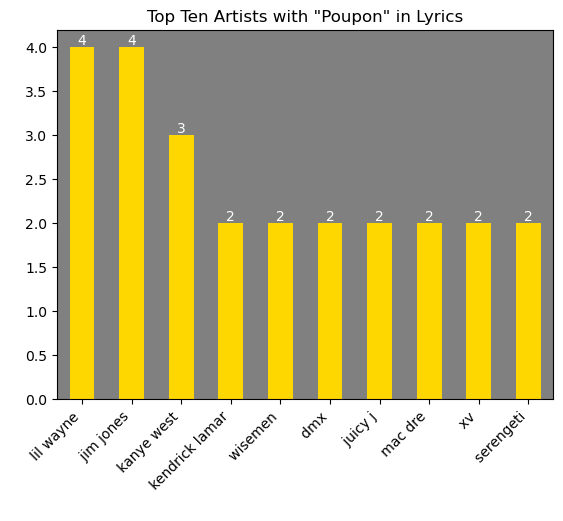

In [31]:
# Top ten artists with songs mentioning "poupon" in lyrics
ax = poupon_lyric_df['artist_name'].value_counts().head(10).plot.bar(title='Top Ten Artists with "Poupon" in Lyrics', color='gold')
ax.set_facecolor('gray')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel=None)

# Add labels to top of each bar
for container in ax.containers:
    ax.bar_label(container, color='w')



<a id='grey_vs_gray'></a>
## 3. Are there alternative spellings of Grey (i.e. Gray) used as well?

### 3.1 First we will make all characters lowercase and remove special characters (i.e. apostrophes, commas, etc.):

In [32]:
# Grey vs Gray vs neither comparison
    # Share of songs that spell grey, gray or neither in lyrics
    
# Make all characters lowercase in lyric_values to avoid double entries due to case sensitivity
lower_poupon_lyrics = poupon_lyric_df['lyric_values'].str.lower()

In [33]:
# Remove all non-alphabet characters from lyric_values
for lyric_line in lower_poupon_lyrics:
    for character in lyric_line:
        if character.isalpha() == False:
            lower_poupon_lyrics = lower_poupon_lyrics.str.replace(character, ' ', regex=False)

In [34]:
# With an "e"
with_e_series = lower_poupon_lyrics[lower_poupon_lyrics.str.contains('grey', regex=False, case=False)] == True

# With an "a"
with_a_series = lower_poupon_lyrics[lower_poupon_lyrics.str.contains('gray', regex=False, case=False)] == True

# Neither word mentioned in lyrics
neither_series = (lower_poupon_lyrics.str.contains('grey', regex=False, case=False) == False) & (lower_poupon_lyrics.str.contains('gray', regex=False, case=False) == False)
neither_series = (neither_series[neither_series] == True)

In [35]:
e_vs_a_vs_none_df = pd.DataFrame(index=['grey', 'gray', 'neither'], data=[len(with_e_series), len(with_a_series), len(neither_series)], columns=['count'])
e_vs_a_vs_none_df


,count
grey,349
gray,17
neither,39


### 3.2 With our count of grey, gray and neither categories, we now have a pie chart showing the breakdown. It's interesting that there are spellings with an "a" when the brand is with an "e"!

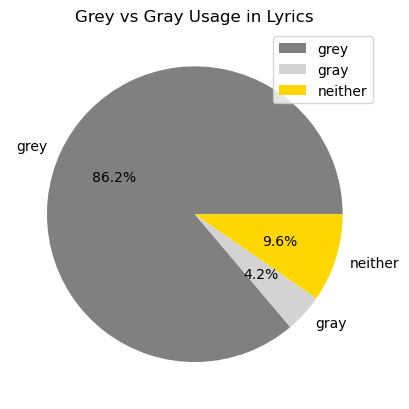

In [36]:
# Pie chart for grey vs gray vs neither
e_vs_a_vs_none_pie = e_vs_a_vs_none_df.plot.pie(y='count', colors=['gray', 'lightgray', 'gold'], ylabel='', autopct='%.1f%%')
e_vs_a_vs_none_pie.set_title('Grey vs Gray Usage in Lyrics');

<a id='top_words'></a>
## 4. What are the top ten words in the lyrics?

### 4.1 Now we will create split the lyric values into individual words, stack words into one column then count occurrences:

In [37]:
word_count_df_2 = lower_poupon_lyrics.str.split(expand=True)

word_count_df_3 = word_count_df_2.stack()


In [38]:
top_words_series = word_count_df_3.value_counts()
top_words_series.head(10)

poupon    391
grey      357
the       285
i         271
on        186
a         176
like      162
you       133
my        129
it        108
Name: count, dtype: int64

In [39]:
# Remove single character words from series as they do not have much value in meaning
for word in top_words_series.index:
    if len(word) < 2:
        top_words_series = top_words_series.drop(labels=word)


In [40]:
top_words_series.head(10)

poupon    391
grey      357
the       285
on        186
like      162
you       133
my        129
it        108
and       107
that      105
Name: count, dtype: int64

### 4.2 Here is the first bar graph using the word data. However, the results are burying verbs, nouns and adjectives, so we will use the textblob library later on to filter only for those.

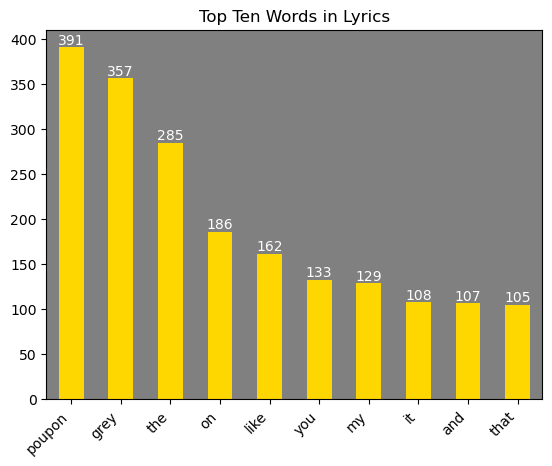

In [41]:
# Top ten words in lyrics
    # Results are burying verbs, nouns and adjectives, so we will use the textblob library later on to filter only for those
ax = top_words_series.head(10).plot.bar(title='Top Ten Words in Lyrics', color='gold')
ax.set_facecolor('gray')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel=None)

# Add labels to top of each bar
for container in ax.containers:
    ax.bar_label(container, color='w')


<a id='poupon_permutations'></a>
## 5. Are there permutations of the word "Poupon" in the lyrics and what are they?

### 5.1 Often in the Hip Hop genre, artists take liberties in the grammar, pronunciation and spellings of words. Let's take a look at all words containing "poupon":

In [42]:
# Create dataframe from series
top_words_df = top_words_series.to_frame()
top_words_df = top_words_df.reset_index()

In [43]:
top_words_df = top_words_df.rename(columns={'index':'word'})
top_words_df

,word,count
0,poupon,391
1,grey,357
2,the,285
3,on,186
4,like,162
...,...,...
1855,fold,1
1856,group,1
1857,livin,1
1858,bum,1


### 5.2 Just as I hoped, there are quite a few different takes on the word! Something interesting to note is how it was changed to a verb with the spelling of "pouponing".

In [44]:
# See all permutations of "poupon" (i.e. all words containing "poupon")
top_words_df[top_words_df['word'].str.contains('poupon')]

,word,count
0,poupon,391
97,poupons,10
293,pouponne,3
454,pouponner,2
1175,pouponin,1
1568,pouponing,1


<a id='nouns_and_verbs'></a>
## 6. What are the most common nouns and verbs used in song lyrics with Grey Poupon?

In [45]:
# Make a list from words series and combine to one string for use by textblob
word_list = top_words_df['word'].to_list()
word_list_str = ' '.join(word_list)

# Remove "\'" characters from string contents
word_list_str = word_list_str.replace("\'", "")


### 6.1 Due to textblob's function of splitting contraction words into two (don't --> don, 't), we will remove all contraction words from dataset with a list of words from wikipedia [[3]](#citations)

In [46]:
# Due to textblob's function of splitting contraction words into two (don't --> don, 't),
    # we will remove all contraction words from dataset with a list of words from wikipedia
# Open the URL of the webpage and scrape page's html
url = requests.get('https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions') 

page_html = bs(url.content) 

# Find table of contraction words to scrape in html
table_data = page_html.find_all("tr")
table_data_list = list(table_data)
table_data_list_str = []

In [47]:
# Convert beautifulsoup object to list of strings
collect_data(table_data_list, table_data_list_str)

# Remove first few rows at top of lists due to unrelated search results
table_data_list_str = table_data_list_str[2:]

In [48]:
clean_table_data_list = []

# Remove leading and trailing html data from constraint word values
remove_html_data(table_data_list_str, 9, clean_table_data_list)

In [49]:
# Remove "(informal)", "(poetic)" and "(formal)" from words
clean_table_data_list_2 = []

for word in clean_table_data_list:
    if ' (informal)' in word:
        clean_word = word.replace(' (informal)', '')
        clean_table_data_list_2.append(clean_word)
        
    elif ' (poetic)' in word:
        clean_word = word.replace(' (poetic)', '')
        clean_table_data_list_2.append(clean_word)
        
    elif ' (formal)' in word:
        clean_word = word.replace(' (formal)', '')
        clean_table_data_list_2.append(clean_word)
    
    elif word == '':
        continue
    
    else:
        clean_table_data_list_2.append(word)

# Remove "/", duplicate "n" value and punctuation characters from word entry
clean_table_data_list_3 = []
for word_2 in clean_table_data_list_2:
    if r"/" in word_2:
        clean_word_2 = word[:3]
        clean_word_2 = clean_word_2.replace("’", "")
        clean_table_data_list_3.append(clean_word_2)
    
    elif "’" in word_2:
        clean_word_2 = word_2.replace("’", "")
        clean_table_data_list_3.append(clean_word_2)
        
    elif r"'" in word_2:
        clean_word_2 = word_2.replace(r"'", "")
        clean_table_data_list_3.append(clean_word_2)
        
    else:
        clean_table_data_list_3.append(word_2)



In [50]:
# Compare word_list_str to list of contraction words
    # if found, word is removed from word_list_str
for contraction_word in clean_table_data_list_3:
    if contraction_word in word_list_str:
        word_list_str = word_list_str.replace(contraction_word, '')


In [51]:
# Convert back to list for iterating through for textblob tags
#     # Remove all non-alphabet characters
word_list = word_list_str.split()


In [52]:
# for loop to input text to textblob function for word catagory tagging
word_list_tags = []
word_list_name = []
for word in word_list:
    word_list_tag_blob = TextBlob(word)
    word_list_name_blob = TextBlob(word)
    word_list_name.append(word_list_name_blob.tags[0][0])
    word_list_tags.append(word_list_tag_blob.tags[0][1])


In [53]:
# Add tags as a new column to top_words_df
word_tag_df = pd.DataFrame(list(zip(word_list_name, word_list_tags)), columns=['word', 'word_tag'])

# Drop duplicates resulting from punctuation cleaning
word_tag_df = word_tag_df.drop_duplicates()
word_tag_df

,word,word_tag
0,poupon,NN
1,grey,NN
2,the,DT
3,on,IN
4,like,IN
...,...,...
1833,fd,NN
1834,group,NN
1835,livin,NN
1836,bum,NN


In [54]:
# Join dataframes against word values to add tag column to top_words_df
top_words_df_2 = pd.merge(top_words_df, word_tag_df, on='word', how='left')


In [55]:
# Filter to only show nouns (singular, plural, proper, plural proper)
top_words_df_2_nouns = top_words_df_2[(top_words_df_2['word_tag'] == 'NN') | (top_words_df_2['word_tag'] == 'NNS') | (top_words_df_2['word_tag'] == 'NNP') | (top_words_df_2['word_tag'] == 'NNPS')] 


In [56]:
# Set word series to index to be usable for bar chart
top_words_df_2_nouns = top_words_df_2_nouns.set_index('word')


In [57]:
top_words_df_2_nouns.head(10)

,count,word_tag
word,,
poupon,391,NN
grey,357,NN
don,41,NN
ayy,28,NN
talk,20,NN
need,20,NN
coupon,19,NN
yeah,18,NN
eat,17,NN


In [58]:
# Drop word_tag series from dataframe
top_words_df_2_nouns = top_words_df_2_nouns.drop(columns=['word_tag'])


In [59]:
# Remove "poupon", "grey" and "gray" due to higher counts from other nouns by a wide marginS
top_words_df_2_nouns = top_words_df_2_nouns.drop(['poupon', 'grey', 'gray'], axis='index')

### 6.2 Now that we can analyze the dataset for nouns and verbs, we can see for nouns that some are related to food (bread and eat)! Note that while "eat" is usually a verb, it can in fact be a noun in some instances. [[4]](#citations)

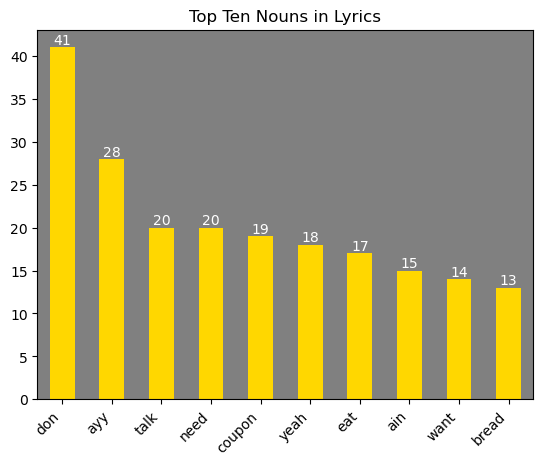

In [60]:
# Top ten nouns in lyrics
ax = top_words_df_2_nouns['count'].head(10).plot.bar(title='Top Ten Nouns in Lyrics', color='gold')
ax.set_facecolor('gray')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel=None)

# Add labels to top of each bar
for container in ax.containers:
    ax.bar_label(container, color='w')

### 6.3 Now we will look at the verbs - Just like the nouns, there are two related to food (eating and have). This is definitely not a coincidence since we are looking at lyrics surrounding the brand name of a condiment!

In [61]:
# Filter to only show verbs (singular, plural, proper, plural proper)
top_words_df_2_verbs = top_words_df_2[(top_words_df_2['word_tag'] == 'VB') | (top_words_df_2['word_tag'] == 'VBD') | (top_words_df_2['word_tag'] == 'VBG') | (top_words_df_2['word_tag'] == 'VBN') | (top_words_df_2['word_tag'] == 'VBP') | (top_words_df_2['word_tag'] == 'VBZ')] 


In [62]:
# Top Ten Verbs in Lyrics
# Set word series to index to be usable for bar chart
top_words_df_2_verbs = top_words_df_2_verbs.set_index('word')
top_words_df_2_verbs.head(10)

,count,word_tag
word,,
got,51,VBD
get,27,VB
have,26,VB
do,25,VB
be,18,VB
go,17,VB
ted,16,VBN
let,13,VB
know,12,VB


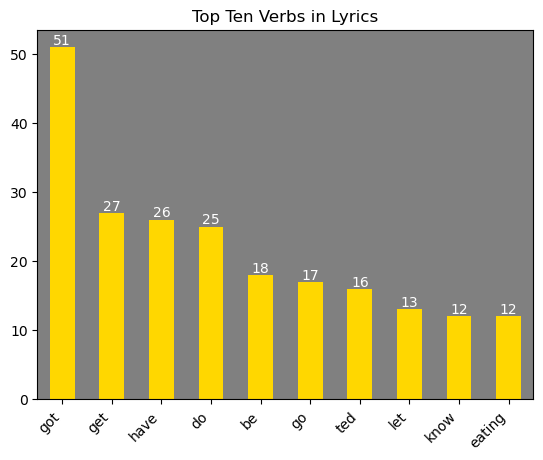

In [63]:
# Top ten verbs in lyrics
ax = top_words_df_2_verbs['count'].head(10).plot.bar(title='Top Ten Verbs in Lyrics', color='gold')
ax.set_facecolor('gray')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel=None)

# Add labels to top of each bar
for container in ax.containers:
    ax.bar_label(container, color='w')

<a id='poupon_rhymes'></a>
## 7. Are there any words in the lyrics that rhyme with "poupon"? Which words and how many?

### 7.1 To begin, we will extract data from rhymezone.com to list words that rhyme with "poupon". [[5]](#citations)

In [64]:
# Rhyming word comparison
    # Pull list of words that rhyme with "poupon" and see which ones occur in lyrics
# Connect to URL of the webpage and scrape page's html
rhyme_url = requests.get('https://www.rhymezone.com/r/rhyme.cgi?Word=poupon&typeofrhyme=perfect&org1=syl&org2=l&org3=y') 

rhyme_page_html = bs(rhyme_url.content) 

rhyme_list = rhyme_page_html.find_all("a", {"class": "r"})

In [65]:
# Create series of strings for html lines and remove bottom rows unrelated to rhyme words
rhyme_str_series = pd.Series(rhyme_list).astype(str)
rhyme_str_series = rhyme_str_series[rhyme_str_series.str.contains('moreideas') == False]

In [66]:
# Remove leading and trailing html data from word values
clean_rhyme_word_list = []
for clean_rhyme_word in rhyme_str_series:
    # Get index position of ">" to slice leading html
    clean_rhyme_word_lead_index = clean_rhyme_word.index('>')
    clean_rhyme_word = clean_rhyme_word[clean_rhyme_word_lead_index + 1:]

    # Get index position of "<" to slice trailing html
    clean_rhyme_word_trail_index = clean_rhyme_word.index('<')
    clean_rhyme_word = clean_rhyme_word[:clean_rhyme_word_trail_index]
    
    clean_rhyme_word_list.append(clean_rhyme_word)

In [67]:
# Create new series with cleaned (html-free) words
clean_rhyme_str_series = pd.Series(data=clean_rhyme_word_list)

In [68]:
# Make series of all words from prior dataframe for comparison to rhyme word list
top_words_series = pd.Series(top_words_df_2['word'])
top_words_series.head(10)

0    poupon
1      grey
2       the
3        on
4      like
5       you
6        my
7        it
8       and
9      that
Name: word, dtype: object

In [69]:
# Compare word_list_str to list of contraction words
    # if found, word is removed from word_list_str
lyric_rhyme_word_list = []
for rhyme_word in clean_rhyme_str_series:
    for lyric_word in top_words_series:
        if rhyme_word == lyric_word:
            lyric_rhyme_word_list.append(rhyme_word)

In [70]:
lyric_rhyme_word_series = pd.Series(data=lyric_rhyme_word_list)

In [71]:
lyric_rhyme_word_df = top_words_df_2[top_words_df_2['word'].isin(lyric_rhyme_word_series)]
lyric_rhyme_word_df = lyric_rhyme_word_df.drop(columns=['word_tag'])
lyric_rhyme_word_df = lyric_rhyme_word_df.set_index('word')

### 7.2 Now we can see the creativity in the lyrics: Not only are there a high amount of words that rhyme with "poupon", but some of them even have a related meaning (such as "dijon", which is the style of mustard).

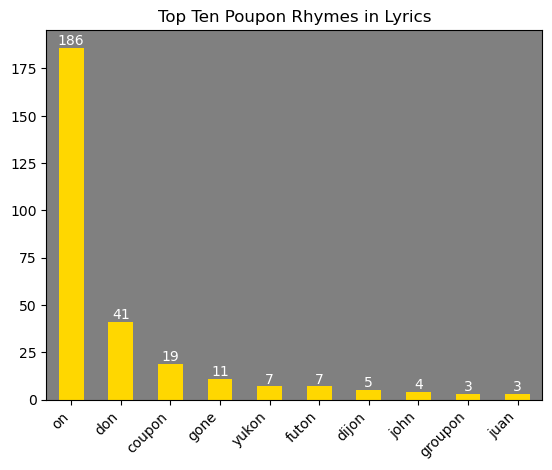

In [72]:
# Top ten words that rhyme with poupon in lyrics
ax = lyric_rhyme_word_df['count'].head(10).plot.bar(title='Top Ten Poupon Rhymes in Lyrics', color='gold')
ax.set_facecolor('gray')
plt.xticks(rotation=45, ha='right')
ax.set(xlabel=None)

# Add labels to top of each bar
for container in ax.containers:
    ax.bar_label(container, color='w')

<a id='citations'></a>
# Citations:
1. Caswell, Estelle and Sarah Frostenson. “How Grey Poupon Became Hip-Hop’s Favorite Condiment.” Vox, 12 Oct. 2016, www.vox.com/videos/2016/10/12/13250360/grey-poupon-in-hip-hop
<br>
<br>
2. “Song Lyrics & Knowledge.” Genius, genius.com/search?q=poupon. Accessed 23 May 2024. 
<br>
<br>
3. “List of English Contractions.” Wikipedia, Wikimedia Foundation, 18 May 2024, en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions.
<br>
<br>
4. “Eat Definition & Meaning.” Merriam-Webster, Merriam-Webster, www.merriam-webster.com/dictionary/eat#dictionary-entry-2. Accessed 23 May 2024.
<br>
<br>
5. “Poupon Rhymes.” RhymeZone, www.rhymezone.com/r/rhyme.cgi?Word=poupon&typeofrhyme=perfect&org1=syl&org2=l&org3=y. Accessed 23 May 2024. 


# Future Improvements:

### While we were able to find many words that rhyme with "poupon", it did not capture them all due to not being in the source to compare the lyrics to. One example is "crouton" a missed opportunity as it is used multiple times and is related to food like Grey Poupon.

In [73]:
# Filter for "crouton" 
top_words_df_2[top_words_df_2['word'].str.contains('crouton')]

,word,count,word_tag
82,croutons,12,NaN
206,crouton,5,NN


### Solution is to pull rhyming words from additional sources (i.e. other websites) and combine to make the rhyme analysis more thorough.

# Special thanks to Estelle Caswell and Sarah Frostenson from Vox.com for their insightful video and article that inspired this analysis!